# Titanic Classification

## Problem Statement

Make a system which tells whether the person will be save from sinking.What factors were most likely lead to success-socio-economic status, age, gender and more.

##  Dataset Description

The aim of this project is simple, given what we know about a passenger aboard the Titanic, can we predict whether or not this passenger has survived? In other words, we want to train a machine learning model to learn the relationship between passenger features and their survival outcome and subsequently make survival predictions on passenger data that model has not seen before.

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build machine learning models. For the training set, provide each passenger outcome (known as the “ground truth”). Your model will be based on “features” like passengers’ gender and class

**The test set** should be used to see how well the model performs on unseen data. For the test set, do not provide the ground truth for each passenger. Using the model we have to predict these outcomes. For each passenger in the test set, use the trained model to predict whether or not they survived the sinking of the Titanic.

# 1. Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import missingno as msno
from collections import Counter

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Data

In [59]:
df_train = pd.read_csv('C:/Users/sankm/Documents/GitHub/titanic-survival-prediction/titanic_data/train.csv')
df_test = pd.read_csv('C:/Users/sankm/Documents/GitHub/titanic-survival-prediction/titanic_data/test.csv')

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [62]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
# Columns in Train dataset
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Attributes Information

**Survived:** 0 = Did not survive, 1 = Survived

**Pclass:** Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

**Sex:** Male or female

**Age:** Age in years, fractional if less than 1

**SibSp:** Number of siblings or spouses aboard the titanic

**Parch:** Number of parents or children aboard the titanic

**Ticket:** Passenger ticket number

**Fare:** Passenger fare

**Cabin:** Cabin number

**Embarked:** Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

- Both the train and test datasets contain categorical and numerical data. The categorical variables include Survived, Pclass, Sex, Cabin, and Embarked, while the numerical variables are Age, Ticket, and Fare.
- The dependent variable is Survived

# 3. Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights.

## 3.1 Data types, missing data and summary statistics

In [64]:
df_train.shape

(891, 12)

The train dataframe contains a total of 12 columns and 891 rows/records.

In [65]:
df_train.info()
print("="*50)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

- Based on the info, we can see that there are columns with data types that include integer, object, and float. 
- Additionally, both the train and test dataframes have missing rows in columns such as age, cabin, and Embarked.

In [66]:
# Missing Values in Train dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
# calculating missing value percentage
(df_train.isnull().sum())/len(df_train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [68]:
# Missing Values in Test dataset
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
# calculating missing value percentage
(df_test.isnull().sum())/len(df_test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<Axes: >

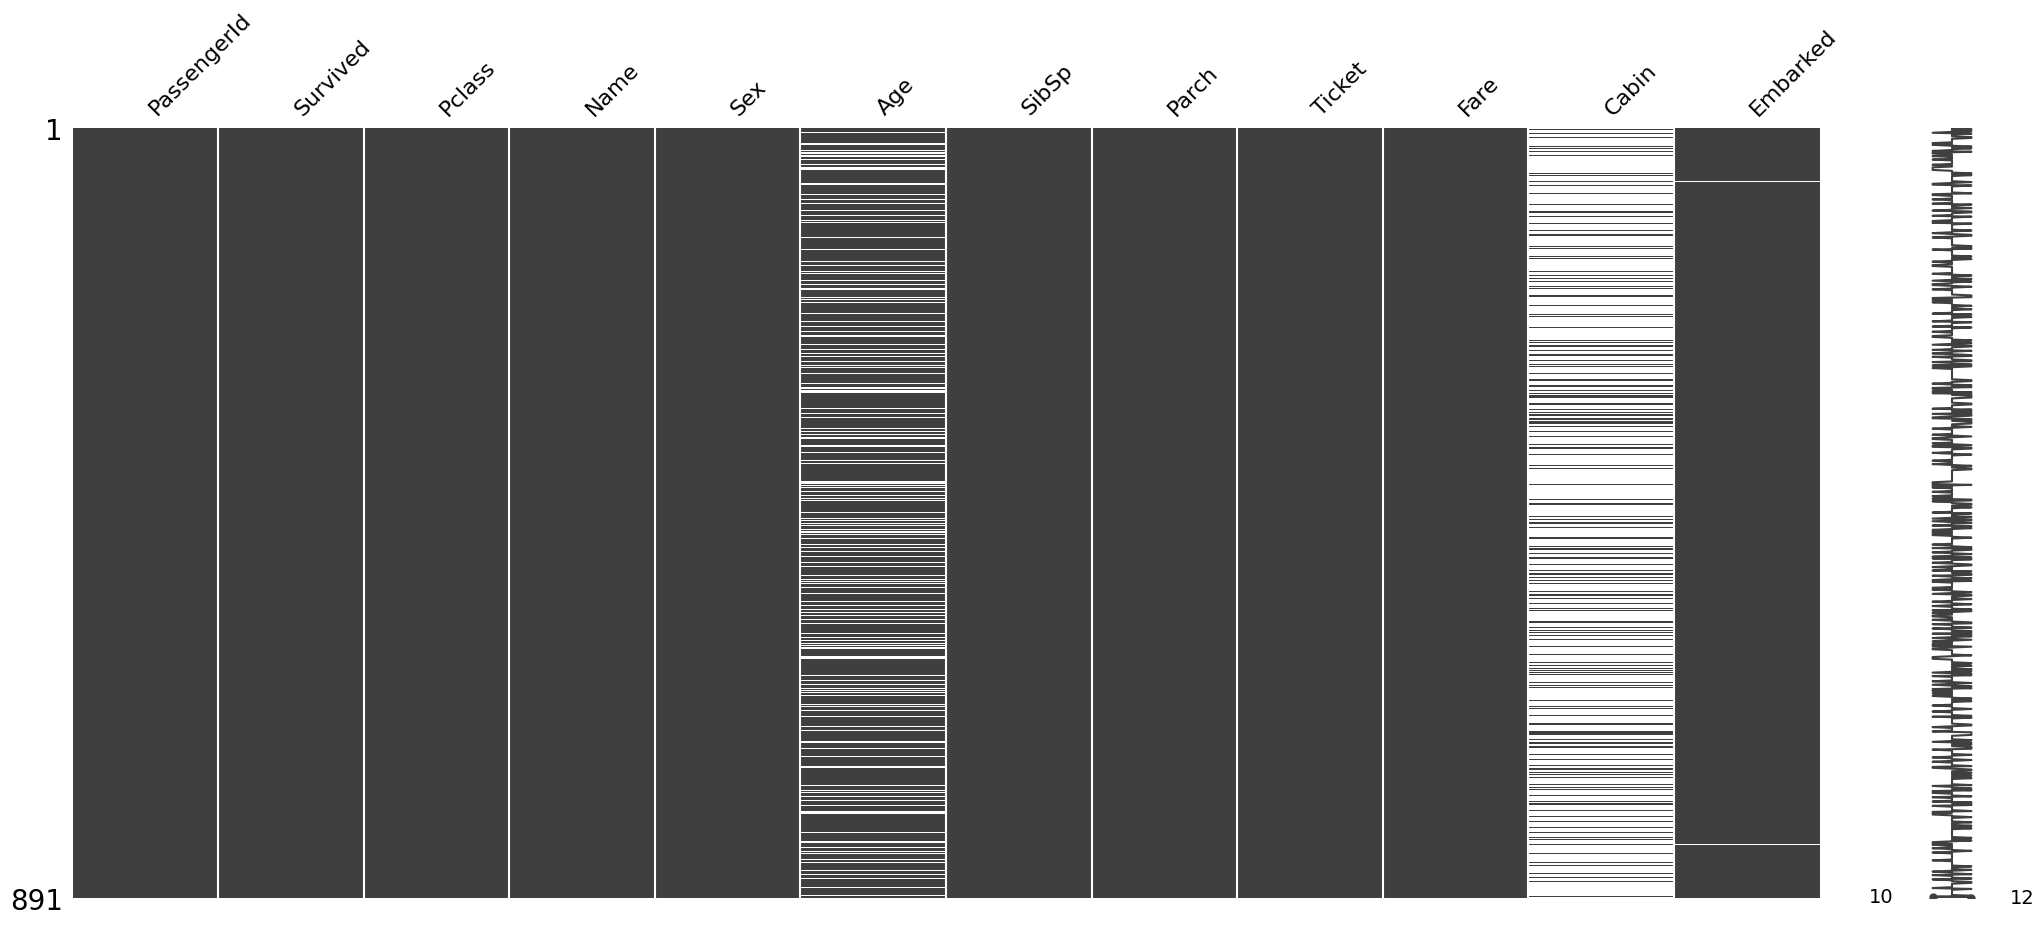

In [70]:
msno.matrix(df_train)

- The age and cabin attributes have a large percentage(train: 19.865320 and 77.104377, test: 20.574163 and 78.229665) of missing rows.
- These missing values need to be removed or replaced with imputed values so that the model can make accurate predictions.

In [71]:
# Summary statistics for training set 

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard. 
- Fares varied significantly with few passengers (<1%) paying as high as $512. Few elderly passengers (<1%) within age range 65-80.

In [72]:
# Summary statistics for testing set
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 3.2 Feature analysis

Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characteristics that help describe these observations.

### 3.2.1 Categorical variables

#### Categorical variable: Pclass

In [73]:
# Value counts of the Pclass column 

df_train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [74]:
# Mean of survival by passenger class

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

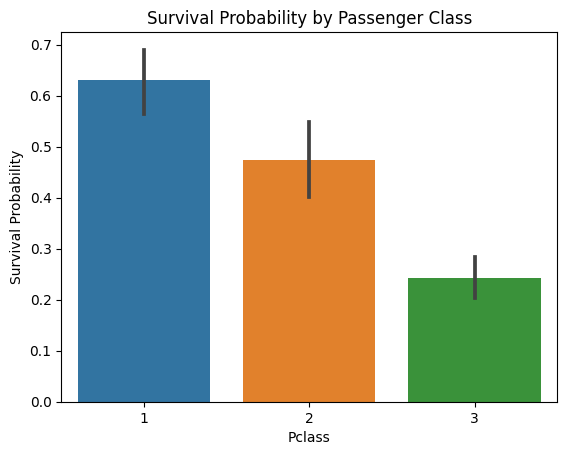

In [75]:
sns.barplot(x = 'Pclass', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

- The survival probability is higher for passengers in class First and lowest for class Third.
- This tells us that the possibility of survival is higher for passengers in First class .

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

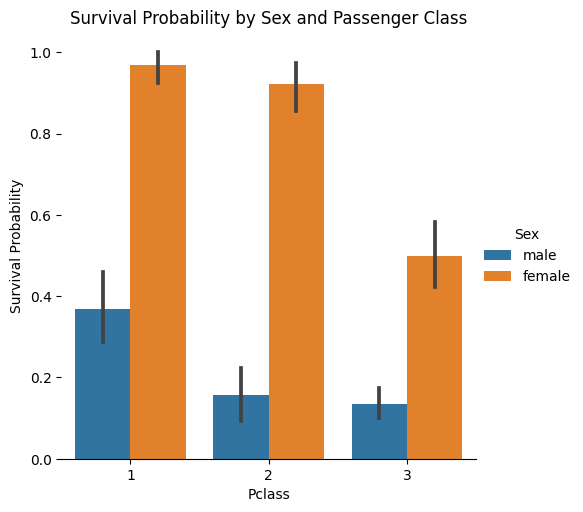

In [76]:
# Survival by gender and passenger class

g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

 - Based on visualization graphs, we can say that the possibility of survival for female passengers is higher than for male passengers in every class.

#### Categorical variable: Embarked

In [77]:
# Value counts of the Embarked column 

df_train['Embarked'].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [78]:
# Mean of survival by point of embarkation

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

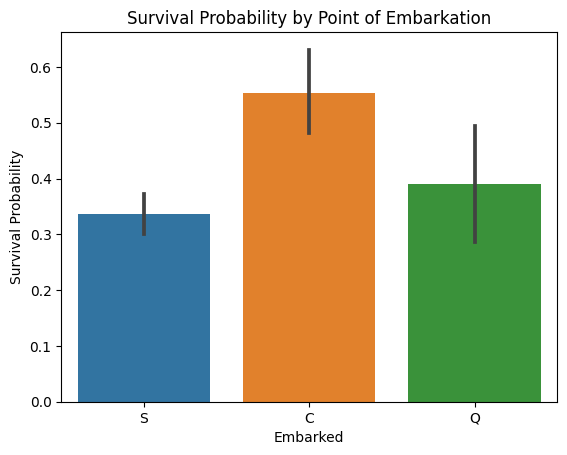

In [79]:
sns.barplot(x = 'Embarked', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

- Survival probability is highest for location C and lowest for location S.

We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

Let us now test this hypothesis.

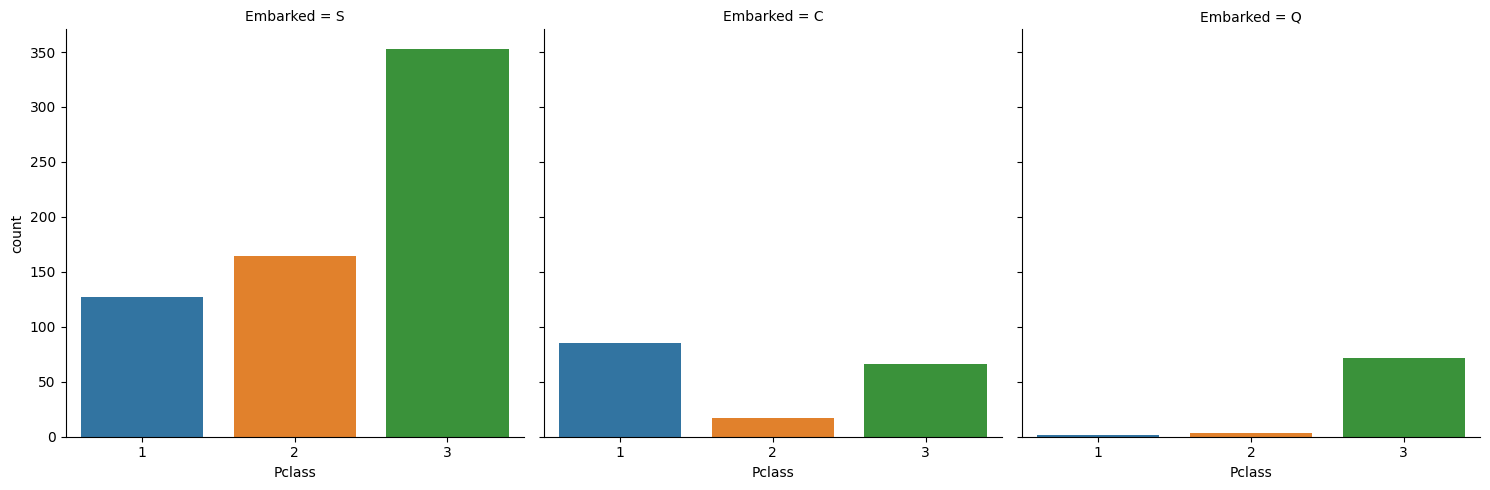

In [80]:
sns.catplot(x = 'Pclass', col = 'Embarked', data = df_train, kind = 'count',)

- Our hypothesis appears to be true. Location S has the most third class passengers whereas location C has the most first class passengers.

#### Categorical variable: Sex

In [81]:
# Value counts of the sex column
df_train['Sex'].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

In [82]:
# Mean of survival by sex

df_train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival_Gender')

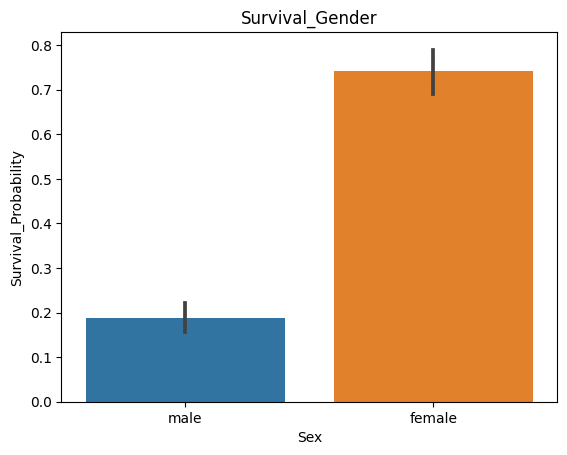

In [83]:
sns.barplot(x = 'Sex', y ='Survived', data = df_train)
plt.ylabel('Survival_Probability')
plt.title('Survival_Gender')

- The survival rate of females is higher than that of male passengers.

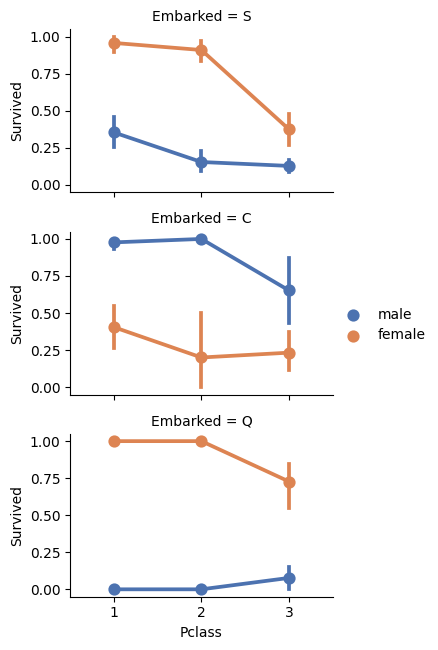

In [84]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(df_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### 3.2.2 Numerical variables

#### Detect and remove outliers in numerical variables

- Outliers are data points that have extreme values and they do not conform with the majority of the data.
- Outliers lead to skew our data towards extremes and can cause inaccurate model predictions.

In [85]:
def find_outliers(df, n, Columns):
    Outliers = []
    for col in Columns: 
        data = sorted(df[col])
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1-(1.5*IQR)
        upper_bound = Q3+(1.5*IQR)
        outlier_list_col = df[(df[col] < lower_bound) | (df[col] >upper_bound)].index
        Outliers.extend(outlier_list_col) 
    Outliers = Counter(Outliers)
    multiple_outliers = list(key for key, value in Outliers.items() if value > n) 
    return multiple_outliers

outliers_to_drop = find_outliers(df_train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)
    

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [86]:
# Outliers in numerical variables

df_train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [87]:
# Drop outliers and reset index

print("Before: {} rows".format(len(df_train)))
df_train = df_train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df_train)))

Before: 891 rows
After: 881 rows


#### Numerical variables correlation with survival

 - Correlation help to find statistical relationship between two variables.
 - It will help to understand relationship between variables.

In [88]:
df_train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr()

,Survived,SibSp,Parch,Age,Fare
Survived,1.000000,0.003330,0.092819,-0.076867,0.264613
SibSp,0.003330,1.000000,0.379281,-0.307129,0.110072
Parch,0.092819,0.379281,1.000000,-0.186457,0.183801
Age,-0.076867,-0.307129,-0.186457,1.000000,0.110219
Fare,0.264613,0.110072,0.183801,0.110219,1.000000


<Axes: >

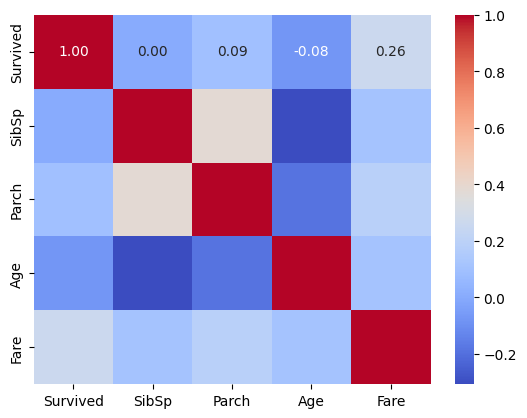

In [89]:
sns.heatmap(df_train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [90]:
corr =df_train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr().abs()
us_corr = (corr.unstack()).sort_values(ascending=False)
us_corr = us_corr[(us_corr<1) & (us_corr>0.3)].drop_duplicates().to_frame()
us_corr.columns = ['correlation']
us_corr


,,correlation
Parch,SibSp,0.379281
SibSp,Age,0.307129


 - By look of correlation values there is relation in columns Parch-Sibsp and SibSp-Age.

#### Numerical variable: SibSp

In [91]:
# Value counts of the SibSp column 

df_train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [92]:
# Mean of survival by SibSp

df_train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


#### Numerical variable: Parch

In [93]:
# Value counts of the Parch column 

df_train['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [94]:
# Mean of survival by Parch

df_train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Numerical variable: Age

In [95]:
# Null values in Age column 

df_train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

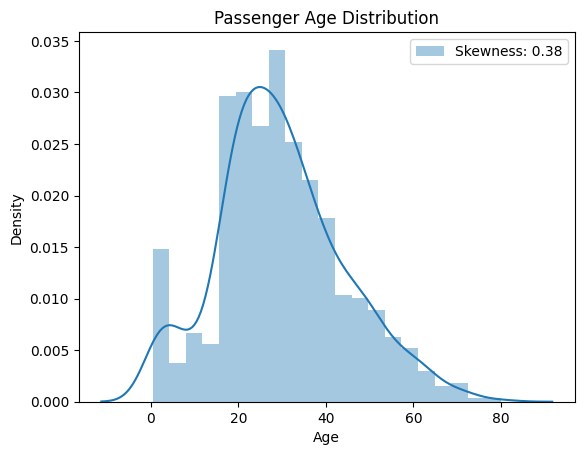

In [96]:
# Passenger age distribution

sns.distplot(df_train['Age'], label = 'Skewness: %.2f'%(df_train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

- The skewness in the age data distribution is 0.38, which shows that the data is fairly symmetrical. 
- Additionally, passengers between the ages of 20-40 are the most common travelers.

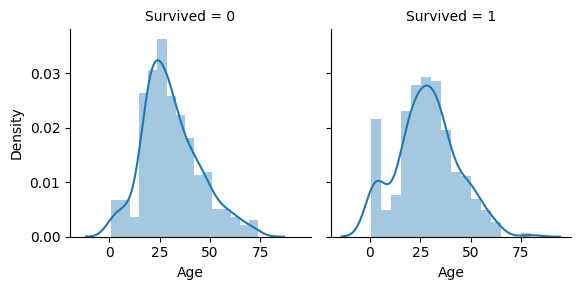

In [97]:
# Age distribution by survival

g = sns.FacetGrid(df_train, col = 'Survived')
g.map(sns.distplot, 'Age')

 - The survival rate of passengers was highest for those between the ages of 23-40

#### Numerical variable: Fare

In [98]:
# Null values of Fare column 

df_train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

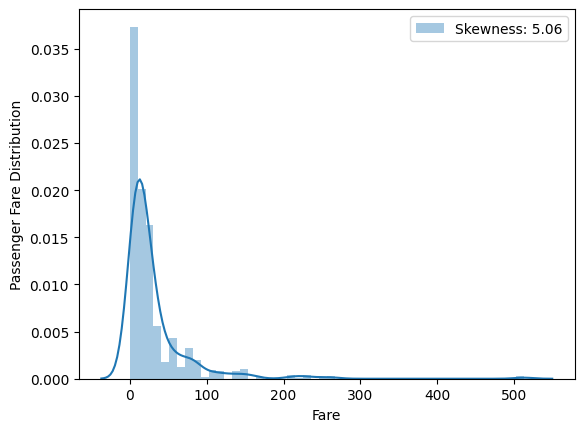

In [99]:
# Passenger fare distribution

sns.distplot(df_train['Fare'], label = 'Skewness: %.2f'%(df_train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

 - The distribution of passenger fares is highly skewed. Before implementation, we need to scale the data.

# 4. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

## 4.1 Drop and fill missing values

In [100]:
# Drop ticket and cabin features from training and test set

df_train = df_train.drop(['Ticket', 'Cabin'], axis = 1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis = 1)

- Dropping the Ticket and Cabin variables because we can differentiate cabin allotment for passengers based on their class, and ticket numbers are random and have no relationship with other variables.

In [101]:
# Missing values in training set 

df_train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [102]:
# Compute the most frequent value of Embarked in training set

mode = df_train['Embarked'].dropna().mode()[0]

# Fill missing value in Embarked with mode

df_train['Embarked'].fillna(mode, inplace = True)

print(mode)

S


- Since the Embarked variable is categorical data, we will impute the missing values with the mode value.

In [103]:
# Compute median of Fare in test set 

fare_median = df_test['Fare'].dropna().median()

# Fill missing value in Fare with median

df_test['Fare'].fillna(fare_median, inplace = True)

- Since the Fare variable data is highly skewed, we will impute missing values with the median value.

In [104]:
# Combine training set and test set

combine = pd.concat([df_train, df_test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [105]:
combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

- We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

In [107]:
# Compute median of Age 

age_median = combine['Age'].dropna().median()

# Fill missing value in Age with median

combine['Age'].fillna(age_median, inplace = True)

In [108]:
combine['Age'].isnull().sum()

0

In [109]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

- The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding

## 4.2 Data transformation

- Passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

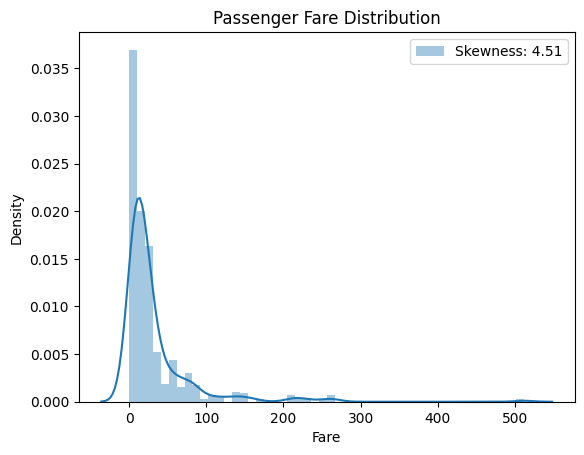

In [110]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [111]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

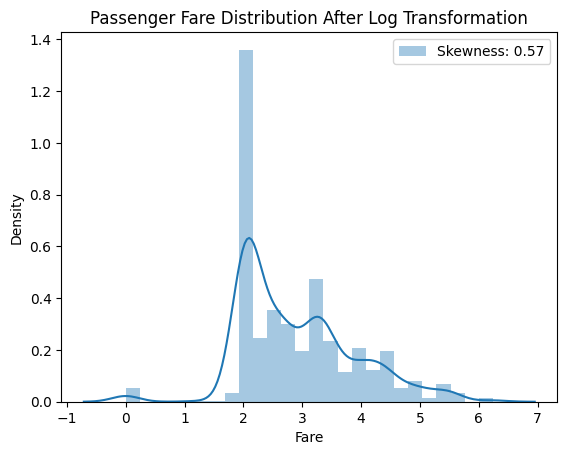

In [112]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## 4.3 Feature engineering

The process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:

- Title
- IsAlone
- Age*Class

### 4.3.1 Title

In [113]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [114]:
# Value counts of Title

combine['Title'].value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [115]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

In [116]:
combine[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.589744
1,Miss,0.711111
2,Mr,0.157895
3,Mrs,0.793651
4,Rare,0.347826


In [117]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


### 4.3.2 Age*Class

In [118]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.346979
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [119]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0.0,3,0,1.0,1,0,1.981001,S,Mr,"(16.136, 32.102]"
1,2,1.0,1,1,2.0,1,0,4.266662,C,Mrs,"(32.102, 48.068]"
2,3,1.0,3,1,1.0,0,0,2.070022,S,Miss,"(16.136, 32.102]"
3,4,1.0,1,1,2.0,1,0,3.972177,S,Mrs,"(32.102, 48.068]"
4,5,0.0,3,0,2.0,0,0,2.085672,S,Mr,"(32.102, 48.068]"


In [120]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [121]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [122]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [123]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass'] 
combine[['Age','Pclass','Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


### 4.3.3 IsAlone

In [124]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1

In [125]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [126]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [127]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [128]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,1,0.0,3,0,1,1.981001,S,Mr,3,0
1,2,1.0,1,1,2,4.266662,C,Mrs,2,0
2,3,1.0,3,1,1,2.070022,S,Miss,3,1
3,4,1.0,1,1,2,3.972177,S,Mrs,2,0
4,5,0.0,3,0,2,2.085672,S,Mr,6,1


## 4.4 Feature encoding

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

In [129]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,1,0.0,3,0,1,1.981001,S,Mr,3,0
1,2,1.0,1,1,2,4.266662,C,Mrs,2,0
2,3,1.0,3,1,1,2.070022,S,Miss,3,1
3,4,1.0,1,1,2,3.972177,S,Mrs,2,0
4,5,0.0,3,0,2,2.085672,S,Mr,6,1


In [130]:
# Encode Title feature

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
combine['Title'] = combine['Title'].map(title_mapping)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,1,0.0,3,0,1,1.981001,S,1,3,0
1,2,1.0,1,1,2,4.266662,C,3,2,0
2,3,1.0,3,1,1,2.070022,S,2,3,1
3,4,1.0,1,1,2,3.972177,S,3,2,0
4,5,0.0,3,0,2,2.085672,S,1,6,1


In [131]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [132]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3
combine['Fare'] = combine['Fare'].astype('int')

In [133]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [134]:
combine[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.341195


In [135]:
combine['Embarked'] = combine['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [136]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,1,0.0,3,0,1,1,0,1,3,0
1,2,1.0,1,1,2,2,1,3,2,0
2,3,1.0,3,1,1,1,0,2,3,1
3,4,1.0,1,1,2,2,0,3,2,0
4,5,0.0,3,0,2,1,0,1,6,1


In [137]:
# Separate training and test set from the combined dataframe

train = combine[:len(df_train)]
test = combine[len(df_train):]

In [138]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')

# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,0,3,0,1,1,0,1,3,0
1,1,1,1,2,2,1,3,2,0
2,1,3,1,1,1,0,2,3,1
3,1,1,1,2,2,0,3,2,0
4,0,3,0,2,1,0,1,6,1


In [139]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
881,892,3,0,2,1,2,1,6,1
882,893,3,1,2,1,0,3,6,0
883,894,2,0,3,1,2,1,6,1
884,895,3,0,1,1,0,1,3,1
885,896,3,1,1,1,0,3,3,0


# 5. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions.dom forest

## 5.1 Split training data into  X_train and Y_train

In [140]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((881, 8), (881,), (418, 8))

- Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column.
- Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

## 5.2 Model Training and predictions

### 5.2.1 Logistic regression

In [141]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.25

### 5.2.2 Support vector machines

In [142]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

### 5.2.3 K-nearest neighbours (KNN)

In [143]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.11

### 5.2.4 Gaussian naive bayes

In [144]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.87

### 5.2.5 Perceptron

In [145]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.3

### 5.2.6 Linear SVC

In [146]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.68

### 5.2.7 Stochastic gradient descent

In [147]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.55

### 5.2.8 Decision tree

In [148]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.58

### 5.2.9 Random forest

In [149]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.58

In [150]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.58
8,Decision Tree,85.58
1,KNN,84.11
0,Support Vector Machines,83.09
2,Logistic Regression,80.25
7,Linear SVC,79.68
6,Stochastic Gradient Decent,78.55
4,Naive Bayes,77.87
5,Perceptron,77.30


In [155]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# 6. Preparing data for submission

In [152]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [153]:
# Create and save csv file 

submit.to_csv("C:/Users/sankm/Documents/GitHub/titanic-survival-prediction/svm_titanic.csv", index = False)